In [1]:
import keras
keras.__version__
import numpy as np
import os, shutil
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau

base_dir = 'data3'

# 훈련, 검증, 테스트 분할을 위한 디렉터리
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

ClothesList = ['top_jacket_beige_pattern', 'top_jacket_beige_plain',
          'top_jacket_black_pattern', 'top_jacket_black_plain', 'top_jacket_blue_pattern',
          'top_jacket_blue_plain', 'top_jacket_brown_pattern', 'top_jacket_brown_plain',
          'top_jacket_green_pattern', 'top_jacket_green_plain', 'top_jacket_grey_pattern',
          'top_jacket_grey_plain', 'top_jacket_red_pattern', 'top_jacket_red_plain',
          'top_jacket_white_pattern', 'top_jacket_white_plain', 'top_jacket_yellow_pattern',
          'top_jacket_yellow_plain']

## train 데이터로 join
for cl in ClothesList :
    globals()['train_{}'.format(cl)] = os.path.join(train_dir, cl)
    
## validation 데이터로 join
for cl in ClothesList :
    globals()['validation_{}'.format(cl)] = os.path.join(validation_dir, cl)
    
## test 데이터로 join
for cl in ClothesList :
    globals()['test_{}'.format(cl)] = os.path.join(test_dir, cl)

Using TensorFlow backend.


In [2]:
## 모델 생성
from keras.applications import ResNet50
from keras.layers import Dense, Input, Activation
from keras.models import Model
from keras.callbacks import EarlyStopping
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization

conv_base = ResNet50(weights = 'imagenet',
                    include_top = False,
                    input_shape = (224,224,3))

from keras import models
from keras import layers

model=models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(18, activation='softmax'))

c:\users\82104\anaconda3\envs\py36\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [3]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# 검증 데이터는 증식되어서는 안 됩니다!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지의 크기를 150 × 150로 변경합니다
        target_size=(224, 224),
        batch_size=20,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='categorical')

model.compile(loss='categorical_crossentropy',
#               optimizer=optimizers.RMSprop(lr=1e-3),
              optimizer=optimizers.Adam(lr=1e-4),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=200,
      epochs=300,
      validation_data=validation_generator,
      validation_steps=8,
      verbose=1)

Found 7390 images belonging to 80 classes.
Found 1049 images belonging to 80 classes.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/300
200/200 [==============================] - 371s 2s/step - loss: 3.1306 - acc: 0.2678 - val_loss: 2.2874 - val_acc: 0.3875
Epoch 2/300
200/200 [==============================] - 345s 2s/step - loss: 1.8689 - acc: 0.4953 - val_loss: 1.4594 - val_acc: 0.5957
Epoch 3/300
200/200 [==============================] - 236s 1s/step - loss: 1.4011 - acc: 0.6012 - val_loss: 1.4257 - val_acc: 0.6171
Epoch 4/300
200/200 [==============================] - 98s 490ms/step - loss: 1.2285 - acc: 0.6357 - val_loss: 1.6318 - val_acc: 0.5831
Epoch 5/300
200/200 [==============================] - 98s 492ms/step - loss: 1.0333 - acc: 0.7015 - val_loss: 1.1205 - val_acc: 0.6744
Epoch 6/300
200/200 [==============================] - 98s 491ms/step - loss: 0.9167 - acc: 0.7215 - val_loss: 1.0249 - val_acc: 0.7279
Epoch 7/3

200/200 [==============================] - 99s 497ms/step - loss: 0.1840 - acc: 0.9387 - val_loss: 0.9915 - val_acc: 0.7930
Epoch 57/300
200/200 [==============================] - 100s 498ms/step - loss: 0.2318 - acc: 0.9242 - val_loss: 0.9619 - val_acc: 0.7891
Epoch 58/300
200/200 [==============================] - 99s 496ms/step - loss: 0.1940 - acc: 0.9340 - val_loss: 1.0192 - val_acc: 0.7736
Epoch 59/300
200/200 [==============================] - 99s 496ms/step - loss: 0.1882 - acc: 0.9357 - val_loss: 0.9909 - val_acc: 0.7969
Epoch 60/300
200/200 [==============================] - 99s 494ms/step - loss: 0.2017 - acc: 0.9345 - val_loss: 1.1329 - val_acc: 0.7872
Epoch 61/300
200/200 [==============================] - 99s 495ms/step - loss: 0.1966 - acc: 0.9360 - val_loss: 0.9779 - val_acc: 0.8017
Epoch 62/300
200/200 [==============================] - 99s 494ms/step - loss: 0.1770 - acc: 0.9440 - val_loss: 1.1483 - val_acc: 0.7493
Epoch 63/300
200/200 [==============================]

Epoch 116/300
200/200 [==============================] - 99s 495ms/step - loss: 0.1226 - acc: 0.9595 - val_loss: 0.9855 - val_acc: 0.7979
Epoch 117/300
200/200 [==============================] - 99s 495ms/step - loss: 0.1236 - acc: 0.9585 - val_loss: 1.3481 - val_acc: 0.7638
Epoch 118/300
200/200 [==============================] - 99s 496ms/step - loss: 0.1295 - acc: 0.9557 - val_loss: 1.2815 - val_acc: 0.7464
Epoch 119/300
200/200 [==============================] - 99s 494ms/step - loss: 0.1163 - acc: 0.9610 - val_loss: 1.1850 - val_acc: 0.7813
Epoch 120/300
200/200 [==============================] - 99s 495ms/step - loss: 0.1281 - acc: 0.9585 - val_loss: 1.1605 - val_acc: 0.7940
Epoch 121/300
200/200 [==============================] - 99s 495ms/step - loss: 0.0982 - acc: 0.9652 - val_loss: 0.9517 - val_acc: 0.8037
Epoch 122/300
200/200 [==============================] - 99s 497ms/step - loss: 0.1111 - acc: 0.9605 - val_loss: 1.1381 - val_acc: 0.7765
Epoch 123/300
200/200 [===========

200/200 [==============================] - 99s 493ms/step - loss: 0.0923 - acc: 0.9695 - val_loss: 1.1618 - val_acc: 0.8047
Epoch 176/300
200/200 [==============================] - 98s 492ms/step - loss: 0.1173 - acc: 0.9640 - val_loss: 1.2118 - val_acc: 0.7843
Epoch 177/300
200/200 [==============================] - 98s 492ms/step - loss: 0.0960 - acc: 0.9707 - val_loss: 0.9877 - val_acc: 0.8124
Epoch 178/300
200/200 [==============================] - 99s 493ms/step - loss: 0.0982 - acc: 0.9678 - val_loss: 1.2402 - val_acc: 0.7959
Epoch 179/300
200/200 [==============================] - 99s 495ms/step - loss: 0.0910 - acc: 0.9712 - val_loss: 1.0846 - val_acc: 0.7949
Epoch 180/300
200/200 [==============================] - 99s 493ms/step - loss: 0.0678 - acc: 0.9757 - val_loss: 1.0583 - val_acc: 0.8387
Epoch 181/300
200/200 [==============================] - 99s 494ms/step - loss: 0.0658 - acc: 0.9780 - val_loss: 1.0631 - val_acc: 0.8076
Epoch 182/300
200/200 [=========================

200/200 [==============================] - 99s 493ms/step - loss: 0.0784 - acc: 0.9755 - val_loss: 1.2222 - val_acc: 0.7901
Epoch 235/300
200/200 [==============================] - 99s 493ms/step - loss: 0.0874 - acc: 0.9713 - val_loss: 1.5043 - val_acc: 0.7561
Epoch 236/300
200/200 [==============================] - 99s 495ms/step - loss: 0.0713 - acc: 0.9755 - val_loss: 1.4190 - val_acc: 0.7843
Epoch 237/300
200/200 [==============================] - 99s 494ms/step - loss: 0.0765 - acc: 0.9743 - val_loss: 1.2766 - val_acc: 0.7464
Epoch 238/300
200/200 [==============================] - 99s 495ms/step - loss: 0.0724 - acc: 0.9747 - val_loss: 1.3041 - val_acc: 0.7804
Epoch 239/300
200/200 [==============================] - 99s 493ms/step - loss: 0.0865 - acc: 0.9730 - val_loss: 1.6084 - val_acc: 0.7677
Epoch 240/300
200/200 [==============================] - 99s 493ms/step - loss: 0.0777 - acc: 0.9760 - val_loss: 1.3258 - val_acc: 0.7911
Epoch 241/300
200/200 [=========================

200/200 [==============================] - 99s 494ms/step - loss: 0.0677 - acc: 0.9775 - val_loss: 1.5343 - val_acc: 0.7590
Epoch 294/300
200/200 [==============================] - 99s 494ms/step - loss: 0.0610 - acc: 0.9795 - val_loss: 1.3712 - val_acc: 0.8017
Epoch 295/300
200/200 [==============================] - 99s 494ms/step - loss: 0.0732 - acc: 0.9800 - val_loss: 1.2558 - val_acc: 0.8017
Epoch 296/300
200/200 [==============================] - 99s 495ms/step - loss: 0.0812 - acc: 0.9747 - val_loss: 1.1743 - val_acc: 0.8192
Epoch 297/300
200/200 [==============================] - 99s 496ms/step - loss: 0.0678 - acc: 0.9775 - val_loss: 1.2313 - val_acc: 0.8105
Epoch 298/300
200/200 [==============================] - 99s 494ms/step - loss: 0.0538 - acc: 0.9815 - val_loss: 1.1427 - val_acc: 0.8290
Epoch 299/300
200/200 [==============================] - 99s 494ms/step - loss: 0.0419 - acc: 0.9855 - val_loss: 1.1130 - val_acc: 0.8309
Epoch 300/300
200/200 [=========================

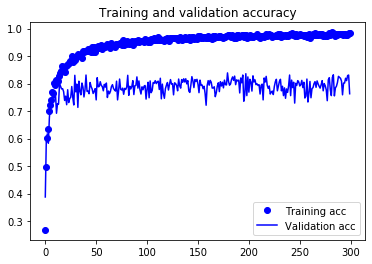

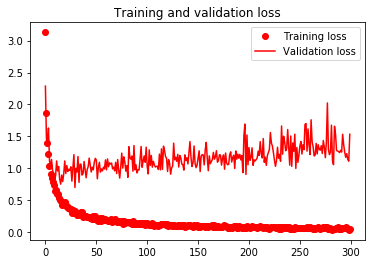

In [6]:
import matplotlib as mpl
import matplotlib.pylab as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [5]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='categorical')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 398 images belonging to 80 classes.
test acc: 0.7269076304024004
